In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import Session

config = ConfigProto()
config.gpu_options.allow_growth = True
sess = Session(config=config)

if tf.test.gpu_device_name():
    print("GPU found")
else:
    print("No GPU found")

GPU found


## Look at the Test Set

In [3]:
dict_genres = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7}

In [4]:
model_root = load_model('models/model_finals/model_root.h5')
model_root_f1 = load_model('models/model_finals/model_root_f1.h5')
model_root_f1_1 = load_model('models/model_finals/model_root_f1_1.h5')
model_root_f1_2 = load_model('models/model_finals/model_root_f1_2.h5')
model_root_f2 = load_model('models/model_finals/model_root_f2.h5')
model_root_f2_1 = load_model('models/model_finals/model_root_f2_1.h5')
model_root_f2_2 = load_model('models/model_finals/model_root_f2_2.h5')

In [5]:
npzfile = np.load('data/test_arr.npz')
print(npzfile.files)

X_test = npzfile['arr_0']
y_test = npzfile['arr_1']
print(X_test.shape, y_test.shape)

['arr_0', 'arr_1']
(800, 640, 128) (800,)


In [6]:
y_test -= 1
print(np.amin(y_test), np.amax(y_test), np.mean(y_test))

0 7 3.5


In [7]:
y_true = y_test

In [8]:
X_test = np.expand_dims(X_test, axis = -1)

In [9]:
print(X_test.shape, y_test.shape, y_true.shape)

(800, 640, 128, 1) (800,) (800,)


In [10]:
class ModelNodeTree:
    def __init__(self, X_test):
        self.X_test = X_test
    
    def node_0(self):
        y_pred = model_root.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

    def node_1(self):
        y_pred = model_root_f1.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

    def node_2(self):
        y_pred = model_root_f2.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

    def node_3(self):
        y_pred = model_root_f1_1.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

    def node_4(self):
        y_pred = model_root_f1_2.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

    def node_5(self):
        y_pred = model_root_f2_1.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

    def node_6(self):
        y_pred = model_root_f2_2.predict(self.X_test)
        direction = np.argmax(y_pred)
        return direction

In [11]:
def modelTree(X_test):
    count = 0
    f1 = False
    f2 = False
    predict = ModelNodeTree(X_test)
    
    for i in range(3):
        if i == 0:
            direction = predict.node_0()
        elif i == 1:
            if direction == 0:
                direction = predict.node_1()
                f1 = True
            else:
                direction = predict.node_2()
                f2 = True
        elif i == 2 and f1:
            if direction == 0:
                direction = predict.node_3()
                if direction == 0:
                    return("Pop")
                else:
                    return("Rock")
            else:
                direction = predict.node_4()
                if direction == 0:
                    return("Folk")
                else:
                    return("Instrumental")
        elif i == 2 and f2:
            if direction == 0:
                direction = predict.node_5()
                if direction == 0:
                    return("Hip-Hop")
                else:
                    return("Electronic")
            else:
                direction = predict.node_6()
                if direction == 0:
                    return("Experimental")
                else:
                    return("International")
        else:
            print("Error")
        count += 1

In [12]:
y_pred = []

for i in range(X_test.shape[0]):
    y_pred.append(dict_genres[modelTree(np.array([X_test[i]]))])

y_pred = np.array(y_pred)

In [13]:
target_names = dict_genres.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(800,) (800,)
               precision    recall  f1-score   support

   Electronic       0.52      0.33      0.40       100
 Experimental       0.34      0.30      0.32       100
         Folk       0.20      0.40      0.26       100
      Hip-Hop       0.53      0.83      0.65       100
 Instrumental       0.23      0.39      0.29       100
International       0.34      0.33      0.33       100
          Pop       0.18      0.04      0.07       100
         Rock       1.00      0.01      0.02       100

     accuracy                           0.33       800
    macro avg       0.42      0.33      0.29       800
 weighted avg       0.42      0.33      0.29       800



Text(91.68, 0.5, 'predicted label')

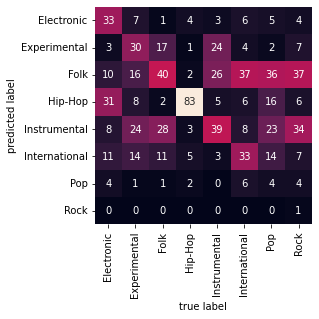

In [14]:
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=dict_genres.keys(), yticklabels=dict_genres.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')

#### TEST

In [ ]:
y_test[0]

In [ ]:
y_pred_prova = model_root.predict(X_test)

In [ ]:
y_pred_prova[0]